# Land Cover Cleanup
> Prachi Ingle, Matteo Kimura, Pratham Babaria

# Section 0 -- Quick Reference

In [1]:
import logging
import pandas as pd
import numpy as np

from go_utils.download import get_api_data, get_country_api_data
from go_utils import lc, cleanup, plot

logger = logging.getLogger()
logger.setLevel(logging.INFO)


In [2]:
start_date = "2017-05-31"
end_date = "2021-02-13"
protocol = "land_covers"

# Section 1 -- Obtaining the Land Cover df + Data Cleanup

## Step 1 - Get the Land Cover Data from GLOBE
Allows users to filter GLOBE API Data by `protocol`, `date_range`, `countryNames`, and/OR a `latlon_box`

### Country Filtered Data
**Note:** This tends to take a long time

In [3]:
lc_df = get_country_api_data(protocol, start_date, end_date, countries = ["Brazil", "United States"])
lc_df

,COUNTRY,COUNTRYAFF,ObjectId,SHAPE,countryCode,countryName,createDate,elevation,landcoversDataSource,landcoversDownwardCaption,...,Longitude,measuredDate,organizationId,organizationName,pid,protocol,publishDate,siteId,siteName,updateDate
0,United States,United States,1,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 10:44:13,177.4,GLOBE Observer App,None,...,-83.210154,2018-11-05,13021519,Shumate Middle School,187088573,land_covers,2021-03-29 10:49:19,50688,17TLG172616,2021-03-29 10:44:13
1,United States,United States,2,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 10:44:13,177.4,GLOBE Observer App,None,...,-83.210154,2018-11-28,13021519,Shumate Middle School,187088761,land_covers,2021-03-29 10:49:19,50688,17TLG172616,2021-03-29 10:44:13
2,United States,United States,3,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 10:44:16,177.4,GLOBE Observer App,None,...,-83.210154,2018-12-05,13021519,Shumate Middle School,187088797,land_covers,2021-03-29 10:49:19,50688,17TLG172616,2021-03-29 10:44:16
3,United States,United States,4,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 10:44:19,177.4,GLOBE Observer App,None,...,-83.210154,2019-01-08,13021519,Shumate Middle School,187088995,land_covers,2021-03-29 10:49:19,50688,17TLG172616,2021-03-29 10:44:19
4,United States,United States,5,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 10:44:23,177.4,GLOBE Observer App,None,...,-83.210154,2019-02-19,13021519,Shumate Middle School,187089364,land_covers,2021-03-29 10:49:19,50688,17TLG172616,2021-03-29 10:44:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16318,United States,United States,16319,"{""x"": -13572501.34283343, ""y"": 5676655.0865635...",USA,United States,2021-03-29 10:48:46,793.6,GLOBE Observer App,None,...,-121.923854,2021-01-09,32402168,"College of Earth, Ocean, Atmospheric Sciences ...",187102280,land_covers,2021-05-13 21:49:54,226717,10TER843223,2021-03-29 10:48:46
16319,United States,United States,16320,"{""x"": -13571929.271970244, ""y"": 5676932.603611...",USA,United States,2021-03-29 10:48:46,925.5,GLOBE Observer App,None,...,-121.918715,2021-01-09,32402168,"College of Earth, Ocean, Atmospheric Sciences ...",187102281,land_covers,2021-05-13 21:49:54,226718,10TER847225,2021-03-29 10:48:46
16320,United States,United States,16321,"{""x"": -13571927.379538903, ""y"": 5677075.167079...",USA,United States,2021-03-29 10:48:46,946.1,GLOBE Observer App,None,...,-121.918698,2021-01-09,32402168,"College of Earth, Ocean, Atmospheric Sciences ...",187102282,land_covers,2021-05-13 21:49:54,226719,10TER847226,2021-03-29 10:48:46
16321,United States,United States,16322,"{""x"": -13571639.28469673, ""y"": 5677356.4989727...",USA,United States,2021-03-29 10:48:46,1024.3,GLOBE Observer App,None,...,-121.916110,2021-01-09,32402168,"College of Earth, Ocean, Atmospheric Sciences ...",187102283,land_covers,2021-05-13 21:49:54,226720,10TER849228,2021-03-29 10:48:46


## Data Without Country Enrichment

The following is an example of regular api data without country or regional filtering. You can still filter by latitude and longitude.

In [4]:
lc_df = get_api_data(protocol, start_date, end_date)
lc_df

,protocol,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,...,landcoversUpwardExtraData,landcoversWestExtraData,landcoversLandCoverId,landcoversMucDescription,landcoversSnowIce,landcoversNorthClassifications,landcoversFieldNotes,landcoversMeasurementLatitude,landcoversMeasurementElevation,landcoversMeasurementLongitude
0,land_covers,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,...,null,null,20411,"Cultivated Land, Agriculture, Other Agriculture",None,None,no changes,NaN,NaN,NaN
1,land_covers,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,...,null,null,20457,"Cultivated Land, Agriculture, Other Agriculture",None,None,no changes,NaN,NaN,NaN
2,land_covers,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,...,null,null,20465,"Cultivated Land, Agriculture, Other Agriculture",None,None,no changes,NaN,NaN,NaN
3,land_covers,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,...,null,null,20460,"Cultivated Land, Agriculture, Other Agriculture",None,None,no changes,NaN,NaN,NaN
4,land_covers,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592.0,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,...,None,None,20463,"Closed Forest, Mainly Evergreen, Tropical Wet ...",None,None,it is submontane,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,land_covers,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229213,33TTG717730,None,...,"(source: app, (compassData.horizon: 88.6))","(source: app, (compassData.horizon: 14.8999999...",39008,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 4b,42.176500,614.3,12.236500
18453,land_covers,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229214,33TTG717724,None,...,"(source: app, (compassData.horizon: 88.1))","(source: app, (compassData.horizon: 1.19999999...",39009,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 3a,42.170553,383.5,12.236674
18454,land_covers,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229215,33TTG720730,None,...,"(source: app, (compassData.horizon: 87.3))","(source: app, (compassData.horizon: 6.89999999...",39010,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"60% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",4a,42.176545,513.0,12.239607
18455,land_covers,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930.0,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,...,"(source: app, (compassData.horizon: 87.1316199...","(source: app, (compassData.horizon: 2.96729478...",39072,None,False,None,(none),16.605500,162.9,104.679000


## Step 2 - Data Cleanup

In [5]:
cleanup.remove_homogenous_cols(lc_df)
lc_df

INFO:root:Dropped: land_covers


,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,countryCode,...,landcoversUpwardExtraData,landcoversWestExtraData,landcoversLandCoverId,landcoversMucDescription,landcoversSnowIce,landcoversNorthClassifications,landcoversFieldNotes,landcoversMeasurementLatitude,landcoversMeasurementElevation,landcoversMeasurementLongitude
0,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,null,null,20411,"Cultivated Land, Agriculture, Other Agriculture",None,None,no changes,NaN,NaN,NaN
1,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,null,null,20457,"Cultivated Land, Agriculture, Other Agriculture",None,None,no changes,NaN,NaN,NaN
2,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,null,null,20465,"Cultivated Land, Agriculture, Other Agriculture",None,None,no changes,NaN,NaN,NaN
3,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,null,null,20460,"Cultivated Land, Agriculture, Other Agriculture",None,None,no changes,NaN,NaN,NaN
4,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592.0,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,HRV,...,None,None,20463,"Closed Forest, Mainly Evergreen, Tropical Wet ...",None,None,it is submontane,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229213,33TTG717730,None,None,...,"(source: app, (compassData.horizon: 88.6))","(source: app, (compassData.horizon: 14.8999999...",39008,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 4b,42.176500,614.3,12.236500
18453,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229214,33TTG717724,None,None,...,"(source: app, (compassData.horizon: 88.1))","(source: app, (compassData.horizon: 1.19999999...",39009,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 3a,42.170553,383.5,12.236674
18454,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229215,33TTG720730,None,None,...,"(source: app, (compassData.horizon: 87.3))","(source: app, (compassData.horizon: 6.89999999...",39010,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"60% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",4a,42.176545,513.0,12.239607
18455,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930.0,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,THA,...,"(source: app, (compassData.horizon: 87.1316199...","(source: app, (compassData.horizon: 2.96729478...",39072,None,False,None,(none),16.605500,162.9,104.679000


In [6]:
cleanup.standardize_null_vals(lc_df, np.nan)
lc_df

,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,countryCode,...,landcoversUpwardExtraData,landcoversWestExtraData,landcoversLandCoverId,landcoversMucDescription,landcoversSnowIce,landcoversNorthClassifications,landcoversFieldNotes,landcoversMeasurementLatitude,landcoversMeasurementElevation,landcoversMeasurementLongitude
0,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20411,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
1,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20457,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
2,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20465,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
3,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20460,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
4,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592.0,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,HRV,...,NaN,NaN,20463,"Closed Forest, Mainly Evergreen, Tropical Wet ...",NaN,NaN,it is submontane,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229213,33TTG717730,NaN,NaN,...,"(source: app, (compassData.horizon: 88.6))","(source: app, (compassData.horizon: 14.8999999...",39008,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 4b,42.176500,614.3,12.236500
18453,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229214,33TTG717724,NaN,NaN,...,"(source: app, (compassData.horizon: 88.1))","(source: app, (compassData.horizon: 1.19999999...",39009,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 3a,42.170553,383.5,12.236674
18454,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229215,33TTG720730,NaN,NaN,...,"(source: app, (compassData.horizon: 87.3))","(source: app, (compassData.horizon: 6.89999999...",39010,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"60% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",4a,42.176545,513.0,12.239607
18455,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930.0,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,THA,...,"(source: app, (compassData.horizon: 87.1316199...","(source: app, (compassData.horizon: 2.96729478...",39072,NaN,False,NaN,(none),16.605500,162.9,104.679000


In [7]:
cleanup.rename_latlon_cols(lc_df)
lc_df

,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,countryCode,...,landcoversUpwardExtraData,landcoversWestExtraData,landcoversLandCoverId,landcoversMucDescription,landcoversSnowIce,landcoversNorthClassifications,landcoversFieldNotes,Latitude,landcoversMeasurementElevation,Longitude
0,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20411,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
1,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20457,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
2,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20465,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
3,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20460,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
4,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592.0,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,HRV,...,NaN,NaN,20463,"Closed Forest, Mainly Evergreen, Tropical Wet ...",NaN,NaN,it is submontane,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229213,33TTG717730,NaN,NaN,...,"(source: app, (compassData.horizon: 88.6))","(source: app, (compassData.horizon: 14.8999999...",39008,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 4b,42.176500,614.3,12.236500
18453,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229214,33TTG717724,NaN,NaN,...,"(source: app, (compassData.horizon: 88.1))","(source: app, (compassData.horizon: 1.19999999...",39009,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 3a,42.170553,383.5,12.236674
18454,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229215,33TTG720730,NaN,NaN,...,"(source: app, (compassData.horizon: 87.3))","(source: app, (compassData.horizon: 6.89999999...",39010,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"60% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",4a,42.176545,513.0,12.239607
18455,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930.0,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,THA,...,"(source: app, (compassData.horizon: 87.1316199...","(source: app, (compassData.horizon: 2.96729478...",39072,NaN,False,NaN,(none),16.605500,162.9,104.679000


In [8]:
lc.cleanup_column_prefix(lc_df)
lc_df

,lc_measuredDate,lc_createDate,lc_updateDate,lc_publishDate,lc_organizationId,lc_organizationName,lc_siteId,lc_siteName,lc_countryName,lc_countryCode,...,lc_UpwardExtraData,lc_WestExtraData,lc_LandCoverId,lc_MucDescription,lc_SnowIce,lc_NorthClassifications,lc_FieldNotes,lc_Latitude,lc_MeasurementElevation,lc_Longitude
0,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20411,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
1,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20457,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
2,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20465,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
3,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,20460,"Cultivated Land, Agriculture, Other Agriculture",NaN,NaN,no changes,NaN,NaN,NaN
4,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592.0,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,HRV,...,NaN,NaN,20463,"Closed Forest, Mainly Evergreen, Tropical Wet ...",NaN,NaN,it is submontane,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229213,33TTG717730,NaN,NaN,...,"(source: app, (compassData.horizon: 88.6))","(source: app, (compassData.horizon: 14.8999999...",39008,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 4b,42.176500,614.3,12.236500
18453,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229214,33TTG717724,NaN,NaN,...,"(source: app, (compassData.horizon: 88.1))","(source: app, (compassData.horizon: 1.19999999...",39009,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"70% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",Rilievo 3a,42.170553,383.5,12.236674
18454,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229215,33TTG720730,NaN,NaN,...,"(source: app, (compassData.horizon: 87.3))","(source: app, (compassData.horizon: 6.89999999...",39010,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,"60% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",4a,42.176545,513.0,12.239607
18455,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930.0,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,THA,...,"(source: app, (compassData.horizon: 87.1316199...","(source: app, (compassData.horizon: 2.96729478...",39072,NaN,False,NaN,(none),16.605500,162.9,104.679000


In [9]:
lc_df = lc.unpack_classifications(lc_df)
lc_df

,lc_measuredDate,lc_createDate,lc_updateDate,lc_publishDate,lc_organizationId,lc_organizationName,lc_siteId,lc_siteName,lc_countryName,lc_countryCode,...,lc_LeavesOnTrees,lc_Userid,lc_RainingSnowing,lc_LandCoverId,lc_MucDescription,lc_SnowIce,lc_FieldNotes,lc_Latitude,lc_MeasurementElevation,lc_Longitude
0,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,NaN,20411,"Cultivated Land, Agriculture, Other Agriculture",NaN,no changes,NaN,NaN,NaN
1,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,NaN,20457,"Cultivated Land, Agriculture, Other Agriculture",NaN,no changes,NaN,NaN,NaN
2,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,NaN,20465,"Cultivated Land, Agriculture, Other Agriculture",NaN,no changes,NaN,NaN,NaN
3,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299.0,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,NaN,NaN,20460,"Cultivated Land, Agriculture, Other Agriculture",NaN,no changes,NaN,NaN,NaN
4,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592.0,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,HRV,...,NaN,NaN,NaN,20463,"Closed Forest, Mainly Evergreen, Tropical Wet ...",NaN,it is submontane,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229213,33TTG717730,NaN,NaN,...,False,79693486.0,False,39008,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,Rilievo 4b,42.176500,614.3,12.236500
18453,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229214,33TTG717724,NaN,NaN,...,False,79693486.0,False,39009,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,Rilievo 3a,42.170553,383.5,12.236674
18454,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129.0,Italy Citizen Science,229215,33TTG720730,NaN,NaN,...,False,79693486.0,False,39010,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,4a,42.176545,513.0,12.239607
18455,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930.0,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,THA,...,True,31502175.0,False,39072,NaN,False,(none),16.605500,162.9,104.679000


In [10]:
cleanup.round_cols(lc_df)
lc_df

INFO:root:Converted to integer: lc_organizationId
INFO:root:Converted to integer: lc_siteId
INFO:root:Rounded to 5 decimals: lc_MGRSLatitude
INFO:root:Rounded to 5 decimals: lc_MGRSLongitude
INFO:root:Converted to integer: lc_elevation
INFO:root:Converted to integer: lc_pid
INFO:root:Converted to integer: lc_East_BarrenBareRock
INFO:root:Converted to integer: lc_East_BarrenDirtOther
INFO:root:Converted to integer: lc_East_BarrenDrySaltFlats
INFO:root:Converted to integer: lc_East_BarrenGlaciers
INFO:root:Converted to integer: lc_East_BarrenPerennialSnowfields
INFO:root:Converted to integer: lc_East_BarrenSandy
INFO:root:Converted to integer: lc_East_CultivatedAthleticFieldGolfCourseCemetery
INFO:root:Converted to integer: lc_East_CultivatedCropsOrPastures
INFO:root:Converted to integer: lc_East_CultivatedOrchards
INFO:root:Converted to integer: lc_East_CultivatedOtherAgriculture
INFO:root:Converted to integer: lc_East_HerbaceousGrasslandFernsOrFlowers
INFO:root:Converted to integer: lc

,lc_measuredDate,lc_createDate,lc_updateDate,lc_publishDate,lc_organizationId,lc_organizationName,lc_siteId,lc_siteName,lc_countryName,lc_countryCode,...,lc_LeavesOnTrees,lc_Userid,lc_RainingSnowing,lc_LandCoverId,lc_MucDescription,lc_SnowIce,lc_FieldNotes,lc_Latitude,lc_MeasurementElevation,lc_Longitude
0,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,-9999,NaN,20411,"Cultivated Land, Agriculture, Other Agriculture",NaN,no changes,-9999.00000,-9999,-9999.00000
1,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,-9999,NaN,20457,"Cultivated Land, Agriculture, Other Agriculture",NaN,no changes,-9999.00000,-9999,-9999.00000
2,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,-9999,NaN,20465,"Cultivated Land, Agriculture, Other Agriculture",NaN,no changes,-9999.00000,-9999,-9999.00000
3,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,NaN,-9999,NaN,20460,"Cultivated Land, Agriculture, Other Agriculture",NaN,no changes,-9999.00000,-9999,-9999.00000
4,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,HRV,...,NaN,-9999,NaN,20463,"Closed Forest, Mainly Evergreen, Tropical Wet ...",NaN,it is submontane,-9999.00000,-9999,-9999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229213,33TTG717730,NaN,NaN,...,False,79693486,False,39008,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,Rilievo 4b,42.17650,614,12.23650
18453,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229214,33TTG717724,NaN,NaN,...,False,79693486,False,39009,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,Rilievo 3a,42.17055,383,12.23667
18454,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229215,33TTG720730,NaN,NaN,...,False,79693486,False,39010,"Trees, Closely Spaced, Deciduous - Broad Leaved",False,4a,42.17654,513,12.23961
18455,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,THA,...,True,31502175,False,39072,NaN,False,(none),16.60550,162,104.67900


# Section 2 -- QA Flags
* Photo QA Flags
 * `lc_PhotoCount`, `lc_RejectedCount`, `lc_PendingCount`, `lc_EmptyCount`
 * `lc_PhotoBitBinary`, `lc_PhotoBitDecimal`
* Classification QA Flags
 * `lc_ClassificationCount`
 * `lc_ClassificationBitBinary`, `lc_PhotoBitDecimal`
* Completeness Scores
 * `lc_SubCompletenessScore`
 * `lc_CumulativeCompletenessScore`


## Photo QA Flags
>**Integer Flags**
* `lc_PhotoCount` -- total number of photos captured per observation
* `lc_RejectedCount` -- of photos taken, total number of rejected photos
* `lc_PendingCount` -- of photos taken, total number of photos with pending approval
* `lc_EmptyCount` -- total number of directions **without** photo

>**Bit Masks**
* `lc_PhotoBitBinary` -- Binary Integer as a String indicating presence of **valid** photos in order: Up, Down, North, South, East, West
 * EX. `"000111"` means there are no valid photos for Up, Down, North. There ARE valid photos for South, East, West
 * **NOTE**: Valid Photo = photo WAS taken, and is neither rejected nor under pending approval
* `lc_PhotoBitDecimal` -- `lc_PhotoBitBinary` as a base 10 integer

In [11]:
lc.photo_bit_flags(
        lc_df,
        "lc_UpwardPhotoUrl",
        "lc_DownwardPhotoUrl",
        "lc_NorthPhotoUrl",
        "lc_SouthPhotoUrl",
        "lc_EastPhotoUrl",
        "lc_WestPhotoUrl",
    )
lc_df

,lc_measuredDate,lc_createDate,lc_updateDate,lc_publishDate,lc_organizationId,lc_organizationName,lc_siteId,lc_siteName,lc_countryName,lc_countryCode,...,lc_FieldNotes,lc_Latitude,lc_MeasurementElevation,lc_Longitude,lc_PhotoCount,lc_RejectedCount,lc_PendingCount,lc_EmptyCount,lc_PhotoBitBinary,lc_PhotoBitDecimal
0,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,no changes,-9999.00000,-9999,-9999.00000,6,0,0,0,111111,63
1,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,no changes,-9999.00000,-9999,-9999.00000,6,0,0,0,111111,63
2,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,no changes,-9999.00000,-9999,-9999.00000,6,0,0,0,111111,63
3,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,no changes,-9999.00000,-9999,-9999.00000,6,0,0,0,111111,63
4,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,HRV,...,it is submontane,-9999.00000,-9999,-9999.00000,0,0,0,6,000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229213,33TTG717730,NaN,NaN,...,Rilievo 4b,42.17650,614,12.23650,6,0,0,0,111111,63
18453,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229214,33TTG717724,NaN,NaN,...,Rilievo 3a,42.17055,383,12.23667,6,0,0,0,111111,63
18454,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229215,33TTG720730,NaN,NaN,...,4a,42.17654,513,12.23961,6,0,0,0,111111,63
18455,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,THA,...,(none),16.60550,162,104.67900,6,0,0,0,111111,63


## Classifications QA Flags
>**Integer Flags**
* `lc_ClassificationCount` -- total number of directions with classifications captured per observation

>**Bit Masks**
* `lc_ClassificationBitBinary` -- Binary Integer as a String indicating presence of classifiactions in order: Up, Down, North, South, East, West
 * EX. `000111` means there are no classifications for Up, Down, North. There ARE classifications for South, East, West
* `lc_ClassificationBitDecimal` -- `lc_ClassificationBitBinary` as a base 10 integer

>**Primary/Secondary Classifications**
* `lc_{Direction}PrimaryClassifications` -- Dictionary (if Classification present) of the most common Land Cover Classifications for that Direction
* `lc_{Direction}SecondaryClassifications` -- Dictionary (if Classification present) of the 2nd most common Land Cover Classifications for that Direction

In [12]:
lc.classification_bit_flags(
        lc_df,
        "lc_NorthPhotoUrl",
        "lc_SouthPhotoUrl",
        "lc_EastPhotoUrl",
        "lc_WestPhotoUrl",
    )
lc_df

,lc_measuredDate,lc_createDate,lc_updateDate,lc_publishDate,lc_organizationId,lc_organizationName,lc_siteId,lc_siteName,lc_countryName,lc_countryCode,...,lc_Longitude,lc_PhotoCount,lc_RejectedCount,lc_PendingCount,lc_EmptyCount,lc_PhotoBitBinary,lc_PhotoBitDecimal,lc_ClassificationCount,lc_ClassificationBitBinary,lc_ClassificationBitDecimal
0,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,-9999.00000,6,0,0,0,111111,63,4,1111,15
1,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,-9999.00000,6,0,0,0,111111,63,4,1111,15
2,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,-9999.00000,6,0,0,0,111111,63,4,1111,15
3,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,-9999.00000,6,0,0,0,111111,63,4,1111,15
4,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,HRV,...,-9999.00000,0,0,0,6,000000,0,0,0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229213,33TTG717730,NaN,NaN,...,12.23650,6,0,0,0,111111,63,4,1111,15
18453,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229214,33TTG717724,NaN,NaN,...,12.23667,6,0,0,0,111111,63,4,1111,15
18454,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229215,33TTG720730,NaN,NaN,...,12.23961,6,0,0,0,111111,63,4,1111,15
18455,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,THA,...,104.67900,6,0,0,0,111111,63,4,1111,15


## Completeness Scores
> `lc_SubCompletenessScore` = $\frac {\#Valid\ Photos\ +\ \#Direction\ Classifications}{10}$
 * $Range: [0,1]$
 * $Denominator = max_{valid photos} + max_{direction classifications} = 6+4 = 10$

> `lc_CumulativeCompletenessScore` = $\frac {\#Columns\ filled}{\#Total\ Columns}$

In [13]:
lc.completion_scores(lc_df)
lc_df

,lc_measuredDate,lc_createDate,lc_updateDate,lc_publishDate,lc_organizationId,lc_organizationName,lc_siteId,lc_siteName,lc_countryName,lc_countryCode,...,lc_RejectedCount,lc_PendingCount,lc_EmptyCount,lc_PhotoBitBinary,lc_PhotoBitDecimal,lc_ClassificationCount,lc_ClassificationBitBinary,lc_ClassificationBitDecimal,lc_SubCompletenessScore,lc_CumulativeCompletenessScore
0,2018-03-02,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,0,0,0,111111,63,4,1111,15,1.0,0.91
1,2018-03-03,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,0,0,0,111111,63,4,1111,15,1.0,0.91
2,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,0,0,0,111111,63,4,1111,15,1.0,0.91
3,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,312299,Srednja skola Vela Luka,5009,Vela Luka,Croatia,HRV,...,0,0,0,111111,63,4,1111,15,1.0,0.91
4,2018-03-04,2021-03-29T10:43:53,2021-03-29T10:43:53,2021-03-29T10:49:19,236592,OS Valentin Klarin,5031,HRAST CRNIKA,Croatia,HRV,...,0,0,6,000000,0,0,0000,0,0.0,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18452,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229213,33TTG717730,NaN,NaN,...,0,0,0,111111,63,4,1111,15,1.0,0.97
18453,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229214,33TTG717724,NaN,NaN,...,0,0,0,111111,63,4,1111,15,1.0,0.97
18454,2021-02-05,2021-03-29T10:48:55,2021-03-29T10:48:55,2021-05-13T21:49:54,17453129,Italy Citizen Science,229215,33TTG720730,NaN,NaN,...,0,0,0,111111,63,4,1111,15,1.0,0.97
18455,2020-08-12,2021-03-29T10:47:50,2021-03-29T10:47:50,2021-04-08T21:05:45,36672930,ubon ratchathani rajabhat university,229726,48QVD657359,Thailand,THA,...,0,0,0,111111,63,4,1111,15,1.0,0.95


# Section 3 -- Graphs

### Multiple Bar Graph - Photo Summary

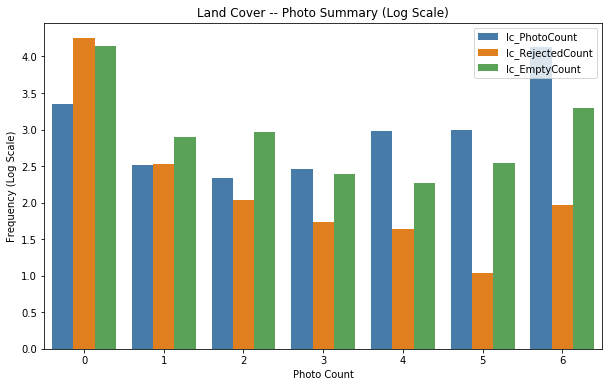

In [14]:
plot.multiple_bar_graph(lc_df, "Land Cover", ["lc_PhotoCount","lc_RejectedCount","lc_EmptyCount"],"Photo Summary",log_scale=True)

### Individual Distributions

#### Valid Photo Count

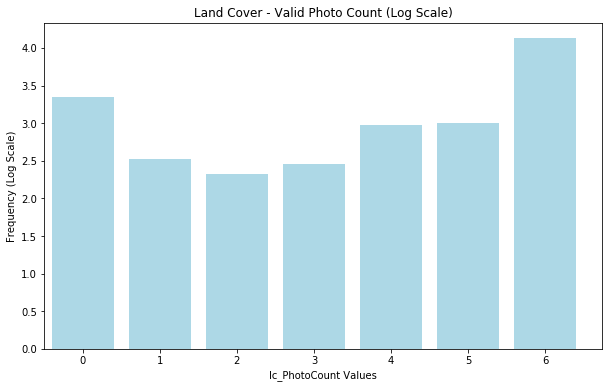

In [15]:
plot.plot_freq_bar(lc_df, "Land Cover", "lc_PhotoCount", "Valid Photo Count",log_scale=True)

#### Rejected Photo Count

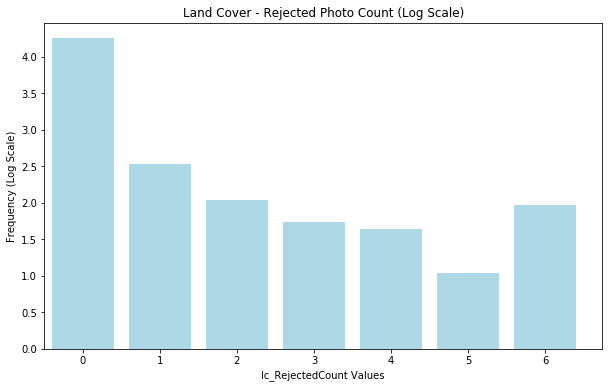

In [16]:
plot.plot_freq_bar(lc_df, "Land Cover", "lc_RejectedCount", "Rejected Photo Count",log_scale=True)

#### Pending Photo Count

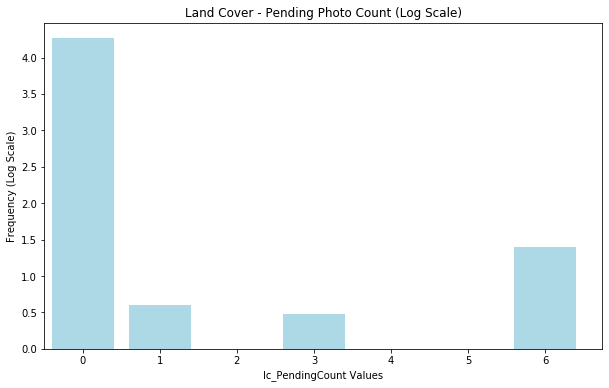

In [17]:
lc.plot_freq_bar(lc_df, "Land Cover", "lc_PendingCount", "Pending Photo Count",log_scale=True)

#### Empty Photo Count

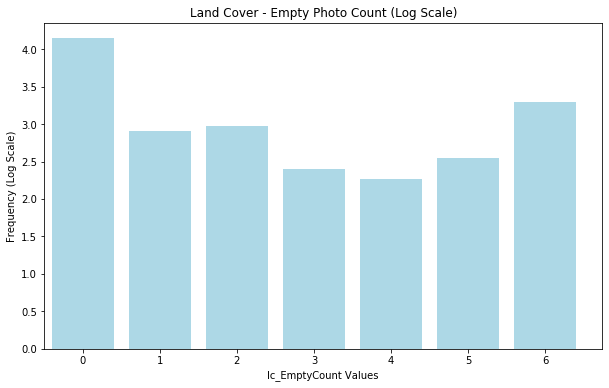

In [18]:
lc.plot_freq_bar(lc_df, "Land Cover", "lc_EmptyCount", "Empty Photo Count",log_scale=True)

### Photo Direction Frequency

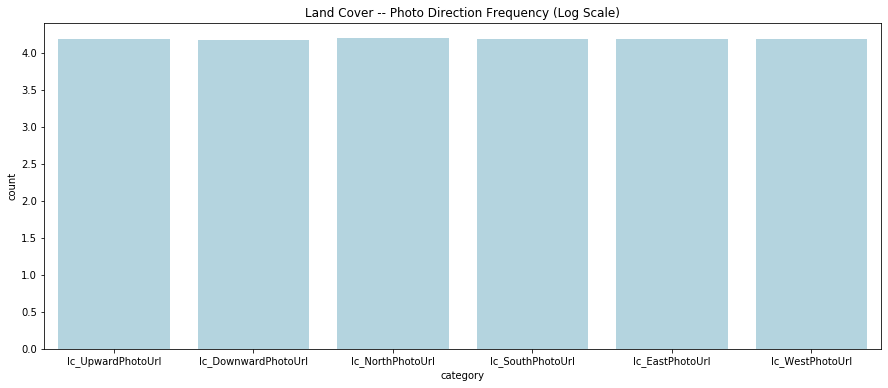

In [19]:
lc.direction_frequency(
        lc_df,
        [
            "lc_UpwardPhotoUrl",
            "lc_DownwardPhotoUrl",
            "lc_NorthPhotoUrl",
            "lc_SouthPhotoUrl",
            "lc_EastPhotoUrl",
            "lc_WestPhotoUrl",
        ],
        "lc_PhotoBitBinary",
        "Photo",
    )

## Classification Plots

### Classification Direction Frequency

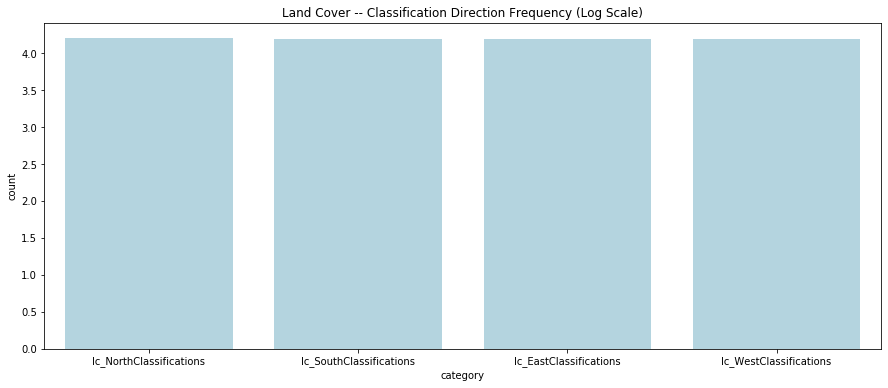

In [20]:
lc.direction_frequency(
        lc_df,
        [
            "lc_NorthClassifications",
            "lc_SouthClassifications",
            "lc_EastClassifications",
            "lc_WestClassifications",
        ],
        "lc_ClassificationBitBinary",
        "Classification",
    )

## Completeness Scores Histogram

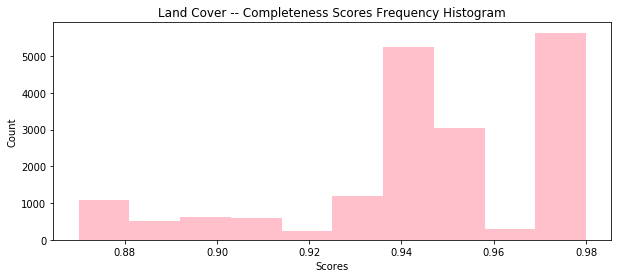

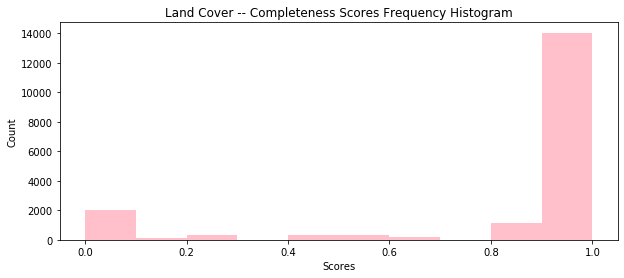

In [21]:
plot.completeness_histogram(
        lc_df, "Land Cover", "lc_CumulativeCompletenessScore", "Cumulative Completeness"
    )
plot.completeness_histogram(
        lc_df, "Land Cover", "lc_SubCompletenessScore", "Sub Completeness"
    )

## Diagnostic Plots

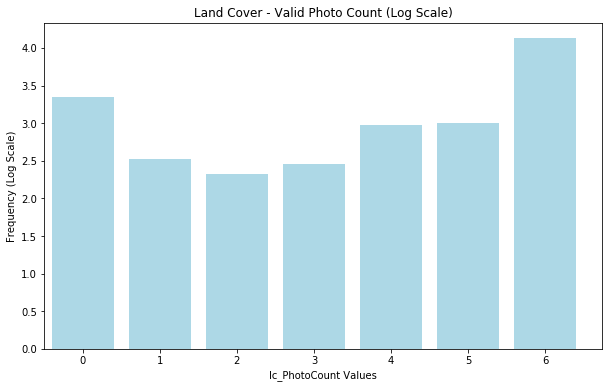

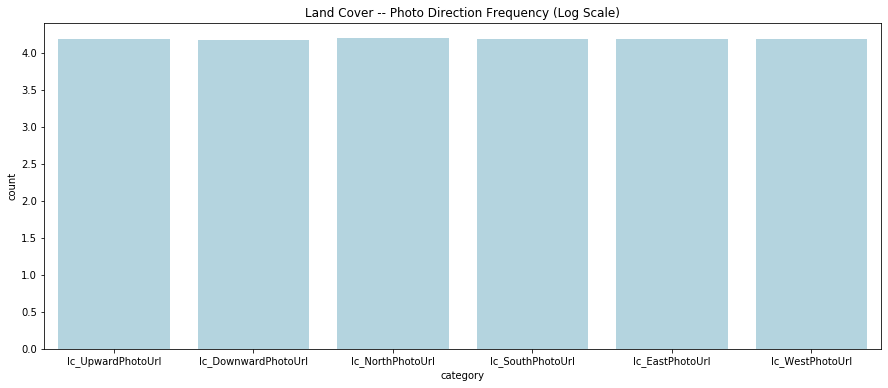

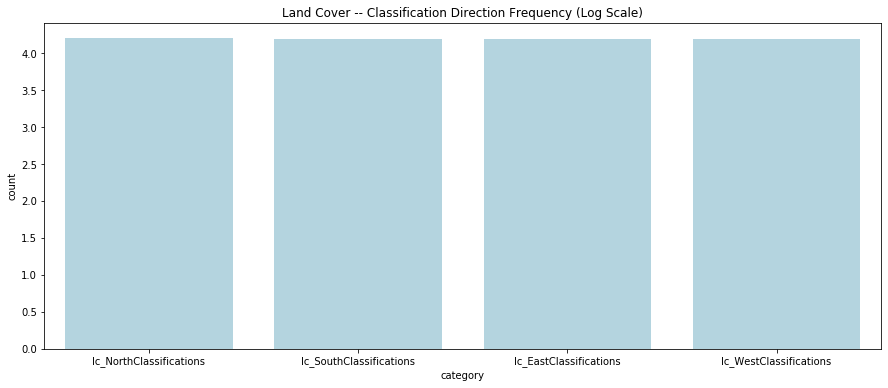

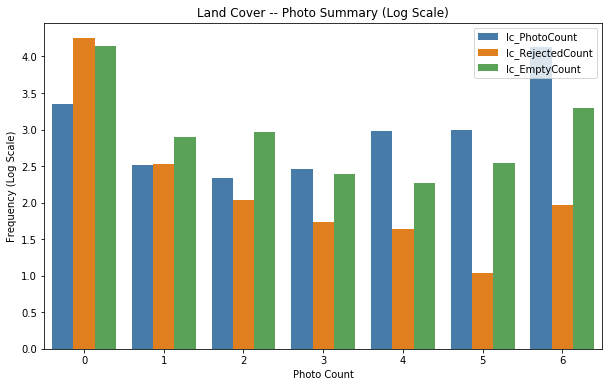

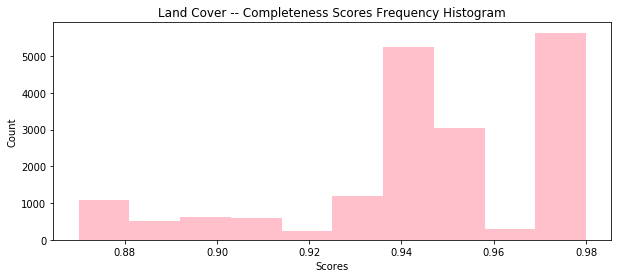

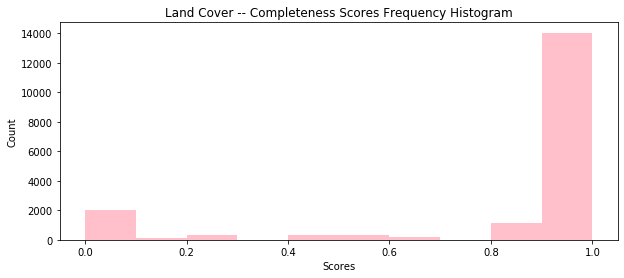

In [22]:
lc.diagnostic_plots(lc_df)

## TODO
- [ ] CSV Download
- [ ] Filtering by parameters
- [ ] Add more distribution plots
- [ ] Add Labels to cleanup steps